In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
metadata = pd.read_csv("non_overlapping_train.csv", index_col=False)
eeg_id = 998499371
metadata.loc[metadata["eeg_id"] == eeg_id]

,Unnamed: 0,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
7356,8094,998499371,0,0,0.0,1707631219,5,1432.0,3522999154,44623,Other,0.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
metadata

,Unnamed: 0,eeg_id,offset_bins,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,total_votes
0,0,568657,0,0,0.0,789577333,0,0.0,1825637311,20654,Other,0.0,0.000000,0.25,0.000000,0.166667,0.583333,12
1,1,582999,0,0,0.0,1552638400,0,0.0,1722186807,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
2,2,582999,2,6,20.0,1552638400,6,20.0,2663298457,20230,LPD,0.0,0.857143,0.00,0.071429,0.000000,0.071429,14
3,3,642382,0,0,0.0,14960202,12,1008.0,3254468733,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1
4,4,642382,2,1,24.0,14960202,13,1032.0,2552357208,5955,Other,0.0,0.000000,0.00,0.000000,0.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30343,33711,4293306306,0,0,0.0,819682076,3,168.0,1974235411,37409,GPD,0.0,0.066667,0.40,0.000000,0.133333,0.400000,15
30344,33712,4293354003,0,0,0.0,1188113564,0,0.0,447244163,16610,GRDA,0.0,0.000000,0.00,0.000000,0.500000,0.500000,2
30345,33713,4293843368,0,0,0.0,1549502620,0,0.0,1618953053,15065,GRDA,0.0,0.000000,0.00,0.000000,0.500000,0.500000,2
30346,33715,4294858825,0,0,0.0,657299228,0,0.0,561576493,4312,Other,0.0,0.000000,0.00,0.000000,0.066667,0.933333,15


In [4]:
eeg_data = pd.read_parquet(f'train_eeg/{eeg_id}.parquet', engine='fastparquet')

In [5]:
len(eeg_data)//200

50

In [6]:
def get_relative_signals(data):
    LL_data = pd.DataFrame()
    RL_data = pd.DataFrame()
    LP_data = pd.DataFrame()
    RP_data = pd.DataFrame()
    C_data = pd.DataFrame()

    LL_data['Fp1 - F7'] = data['Fp1'] - data['F7']
    LL_data['F7 - T3'] = data['F7'] - data['T3']
    LL_data['T3 - T5'] = data['T3'] - data['T5']
    LL_data['T5 - O1'] = data['T5'] - data['O1']

    RL_data['Fp2 - F8'] = data['Fp2'] - data['F8']
    RL_data['F8 - T4'] = data['F8'] - data['T4']
    RL_data['T4 - T6'] = data['T4'] - data['T6']
    RL_data['T6 - O2'] = data['T6'] - data['O2']

    LP_data['Fp1 - F3'] = data['Fp1'] - data['F3']
    LP_data['F3 - C3'] = data['F3'] - data['C3']
    LP_data['C3 - P3'] = data['C3'] - data['P3']
    LP_data['P3 - O1'] = data['P3'] - data['O1']

    RP_data['Fp2 - F4'] = data['Fp2'] - data['F4']
    RP_data['F4 - C4'] = data['F4'] - data['C4']
    RP_data['C4 - P4'] = data['C4'] - data['P4']
    RP_data['P4 - O2'] = data['P4'] - data['O2']

    C_data['Fz - Cz'] = data['Fz'] - data['Cz']
    C_data['Cz - Pz'] = data['Cz'] - data['Pz']
    
    return(LL_data, RL_data, LP_data, RP_data, C_data)

In [7]:
def eeg_plot(LL_data, RL_data, LP_data, RP_data, C_data):
    fig, axs = plt.subplots(5, figsize=(24,12))
    
    axs[0].plot(LL_data['Fp1 - F7'], label='Fp1 - F7')
    axs[0].plot(LL_data['F7 - T3'], label='F7 - T3')
    axs[0].plot(LL_data['T3 - T5'], label='T3 - T5')
    axs[0].plot(LL_data['T5 - O1'], label='T5 - O1')
    axs[0].legend(loc='upper right')
    axs[0].set_title('LL')

    axs[1].plot(RL_data['Fp2 - F8'], label='Fp2 - F8')
    axs[1].plot(RL_data['F8 - T4'], label='F8 - T4')
    axs[1].plot(RL_data['T4 - T6'], label='T4 - T6')
    axs[1].plot(RL_data['T6 - O2'], label='T6 - O2')
    axs[1].legend(loc='upper right')
    axs[1].set_title('RL')

    axs[2].plot(LP_data['Fp1 - F3'], label='Fp1 - F3')
    axs[2].plot(LP_data['F3 - C3'], label='F3 - C3')
    axs[2].plot(LP_data['C3 - P3'], label='C3 - P3')
    axs[2].plot(LP_data['P3 - O1'], label='P3 - O1')
    axs[2].legend(loc='upper right')
    axs[2].set_title('LP')

    axs[3].plot(RP_data['Fp2 - F4'], label='Fp2 - F4')
    axs[3].plot(RP_data['F4 - C4'], label='F4 - C4')
    axs[3].plot(RP_data['C4 - P4'], label='C4 - P4')
    axs[3].plot(RP_data['P4 - O2'], label='P4 - O2')
    axs[3].legend(loc='upper right')
    axs[3].set_title('RP')

    axs[4].plot(C_data['Fz - Cz'], label='Fz - Cz')
    axs[4].plot(C_data['Cz - Pz'], label='Cz - Pz')
    axs[4].legend(loc='upper right')
    axs[4].set_title('C')    
    
    plt.tight_layout()
    plt.show()

In [8]:
eeg_data.shape

(10000, 20)

In [9]:
eeg_data

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-622.859985,-111.389999,-171.729996,-896.409973,-59.020000,1026.140015,-999.020020,-162.960007,-195.919998,-1011.520020,-1464.239990,837.919983,768.270020,524.500000,703.679993,779.969971,917.940002,792.200012,1007.260010,60.610001
1,419.230011,-303.059998,-5.580000,866.900024,-14.090000,179.970001,957.820007,-99.690002,218.520004,836.590027,1364.280029,-1170.750000,-997.159973,-776.250000,-900.130005,-1028.000000,-905.179993,-973.500000,-910.229980,40.410000
2,176.779999,-197.250000,36.689999,188.479996,239.789993,400.880005,215.059998,86.129997,-123.080002,-162.429993,70.449997,-113.779999,148.869995,167.210007,259.459991,80.279999,43.860001,224.369995,298.540009,-13.560000
3,-722.549988,-94.370003,-157.910004,-1147.890015,35.619999,1113.859985,-1276.030029,-114.309998,-320.869995,-1386.880005,-1924.939941,1232.160034,1184.579956,863.979980,1112.270020,1189.099976,1265.920044,1223.390015,1444.569946,46.790001
4,66.190002,-283.920013,-81.879997,355.959991,-92.250000,463.359985,384.670013,-197.250000,142.759995,361.269989,613.559998,-661.409973,-611.690002,-517.590027,-590.159973,-609.570007,-439.170013,-599.469971,-478.239990,66.190002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,483.829987,-1062.030029,10130.309570,133.720001,580.590027,-2206.459961,342.670013,77.620003,111.919998,-376.959991,980.940002,-561.190002,-543.109985,-405.399994,-320.600006,-254.940002,-235.270004,-237.929993,-25.790001,2.390000
9996,-538.859985,-885.770020,10222.559570,-1655.640015,530.880005,-1587.589966,-1706.150024,74.430000,-225.699997,-2183.070068,-1428.089966,1410.810059,1209.829956,841.650024,1228.439941,1538.670044,1558.079956,1512.619995,1833.760010,25.520000
9997,-242.979996,-973.500000,10361.860352,-898.530029,284.980011,-1815.410034,-831.280029,-140.889999,90.650002,-1161.719971,-97.559998,305.980011,0.270000,-139.830002,47.049999,385.730011,574.739990,283.380005,588.039978,75.500000
9998,594.419983,-1087.280029,10238.780273,397.690002,483.029999,-2277.439941,651.840027,4.250000,230.750000,7.180000,1470.089966,-952.770020,-977.219971,-754.719971,-734.780029,-670.450012,-583.250000,-673.640015,-468.410004,13.300000


In [10]:
# Define EEG bands
eeg_bands = {'Delta': (0, 4),
             'Theta': (4, 8),
             'Alpha': (8, 12),
             'Beta': (12, 30),
             'Gamma': (30, 45)}

In [11]:
def get_frequencies(data):
    # Get real amplitudes of FFT (only in postive frequencies)
    fft_vals = np.absolute(np.fft.rfft(data.to_numpy(), axis=0))
    
    # Get frequencies for amplitudes in Hz
    fft_freq = np.fft.rfftfreq(len(data), 1.0/512)
    
    # Take the mean of the fft amplitude for each EEG band
    eeg_band_fft = dict()
    for band in eeg_bands:  
        freq_ix = np.where((fft_freq >= eeg_bands[band][0]) & 
                           (fft_freq <= eeg_bands[band][1]))[0]
        eeg_band_fft[band] = np.mean(fft_vals[freq_ix])

    return eeg_band_fft

In [12]:
def plot_frequencies(eeg_band_fft):
    df = pd.DataFrame(columns=['band', 'val'])
    df['band'] = eeg_bands.keys()
    df['val'] = [eeg_band_fft[band] for band in eeg_bands]
    ax = df.plot.bar(x='band', y='val', legend=False)
    ax.set_xlabel("EEG band")
    ax.set_ylabel("Mean band Amplitude")

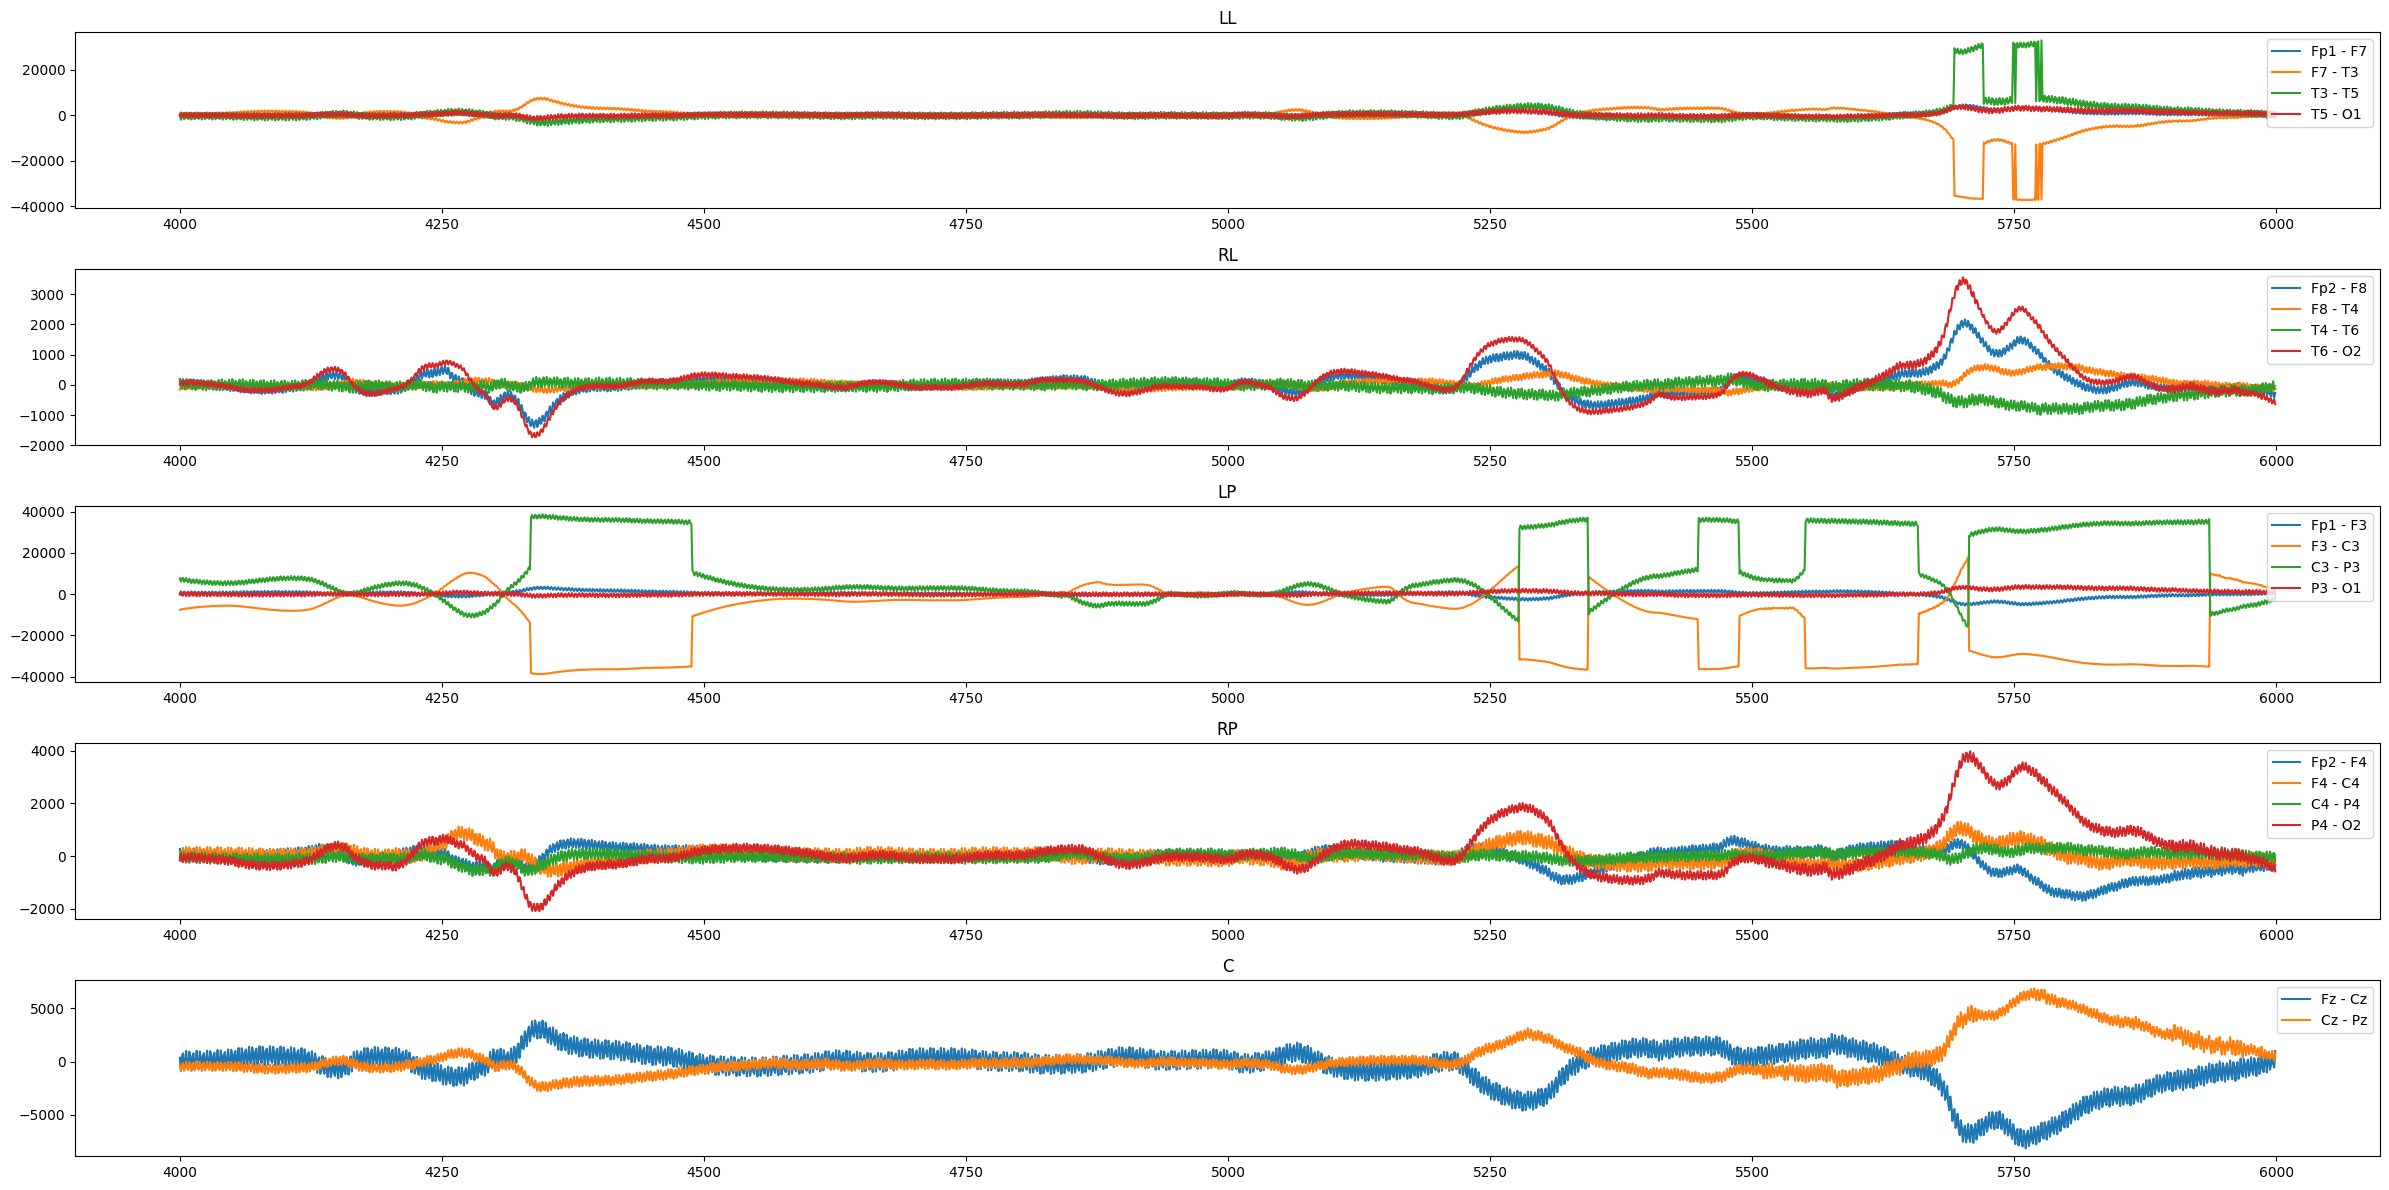

In [13]:
for offset in metadata.loc[metadata["eeg_id"] == eeg_id]['eeg_label_offset_seconds'].to_numpy():
    mid = (int(offset) + 25) * 200
    data = eeg_data.iloc[mid - 1000 : mid + 1000, :]

    LL_data, RL_data, LP_data, RP_data, C_data = get_relative_signals(data)
    eeg_plot(LL_data, RL_data, LP_data, RP_data, C_data)

In [14]:
LL_data.mean(axis=1)

4000     49.779999
4001    220.047485
4002     12.892502
4003    -24.059998
4004    206.622528
           ...    
5995    314.154968
5996    112.315033
5997    312.824982
5998    380.815002
5999    130.857483
Length: 2000, dtype: float32

In [15]:
eeg_band_fft = get_frequencies(LL_data)

In [16]:
data_list = ["LL_data", "RL_data", "LP_data", "RP_data", "C_data"]

In [17]:
def get_freq_data(eeg_id, offset):
    eeg_data = pd.read_parquet(f'train_eeg/{eeg_id}.parquet', engine='fastparquet')
    
    mid = (int(offset) + 25) * 200
    data = eeg_data.iloc[mid - 1000 : mid + 1000, :]

    LL_data, RL_data, LP_data, RP_data, C_data = get_relative_signals(data)
    
    freq_df = pd.DataFrame({"band": ["Delta", "Theta", "Alpha", "Beta", "Gamma"]})
    i = 0
    for d in [LL_data, RL_data, LP_data, RP_data, C_data]:
        eeg_band_fft = get_frequencies(d.mean(axis=1))
        freq_df[data_list[i]] = pd.DataFrame({data_list[i]: list(eeg_band_fft.values())})
        i += 1
    freq_df.set_index("band", inplace=True)
    freq_df = freq_df.unstack().to_frame().T
    freq_df.columns = freq_df.columns.map('{0[0]}_{0[1]}'.format)
    
    data50 = eeg_data.iloc[mid - 5000 : mid + 5000, :]

    LL_data, RL_data, LP_data, RP_data, C_data = get_relative_signals(data50)
    
    freq_df50 = pd.DataFrame({"band": ["Delta", "Theta", "Alpha", "Beta", "Gamma"]})
    i = 0
    for d in [LL_data, RL_data, LP_data, RP_data, C_data]:
        eeg_band_fft = get_frequencies(d.mean(axis=1))
        freq_df50[data_list[i]] = pd.DataFrame({data_list[i]: list(eeg_band_fft.values())})
        i += 1
    freq_df50.set_index("band", inplace=True)
    freq_df50 = freq_df50.unstack().to_frame().T
    freq_df50.columns = freq_df50.columns.map('{0[0]}_{0[1]}'.format)
    
    return(freq_df, freq_df50)

In [18]:
freq_df, freq_df50 = get_freq_data(eeg_id, 0)

In [19]:
freq_df50

,LL_data_Delta,LL_data_Theta,LL_data_Alpha,LL_data_Beta,LL_data_Gamma,RL_data_Delta,RL_data_Theta,RL_data_Alpha,RL_data_Beta,RL_data_Gamma,...,RP_data_Delta,RP_data_Theta,RP_data_Alpha,RP_data_Beta,RP_data_Gamma,C_data_Delta,C_data_Theta,C_data_Alpha,C_data_Beta,C_data_Gamma
0,78356.198349,11680.894014,5778.240321,1377.395308,731.207064,130899.604864,42357.437302,20269.155989,3406.117611,805.675441,...,130899.60485,42357.437327,20269.155947,3406.117566,805.675449,166529.10183,42523.028263,21784.626762,6644.874672,3722.632067


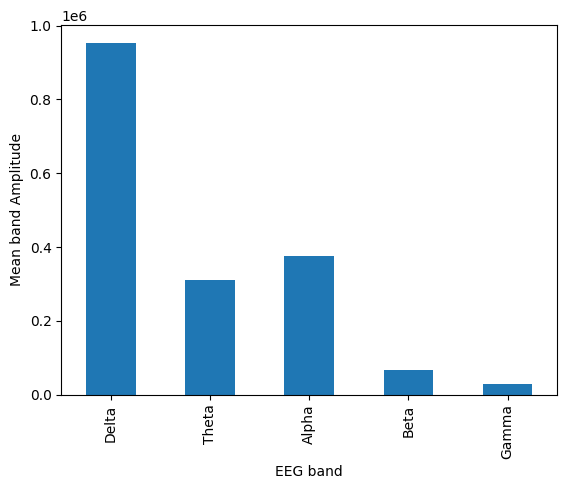

In [20]:
plot_frequencies(eeg_band_fft)